In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import dataset
from sklearn.datasets import load_breast_cancer

# For precision, recall, etc.
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Import the selector module, and the accuracy_score module to computer performance
from sklearn.metrics import f1_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import matplotlib.pyplot as plt


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Advanced Features Claims Data.csv')

In [3]:
df.head()

,Unnamed: 0,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,auto_model,auto_year,fraud_reported,fraud_reported_numeric,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,Positive_Net_Value
0,0,328,48,521585,41929.0,OH,250/500,1000,1406.91,0,...,92x,2004,Y,1,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000,N
1,1,228,42,342868,38895.0,IN,250/500,2000,1197.22,5000000,...,E400,2007,Y,1,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000,Y
2,2,134,29,687698,36775.0,OH,100/300,2000,1413.14,5000000,...,RAM,2007,N,0,Young Adult,Established Client,11.166667,15780.063333,-18869.936667,N
3,3,256,41,227811,33018.0,IL,250/500,2000,1415.74,6000000,...,Tahoe,2014,Y,1,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667,N
4,4,228,44,367455,41796.0,IL,500/1000,1000,1583.91,6000000,...,RSX,2009,N,0,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000,Y


In [24]:
# labels
y = df['fraud_reported']

# features
X = df.drop(['fraud_reported', 'fraud_reported_numeric', 'Unnamed: 0'], axis=1)

In [25]:
# Transforming the Features
X_transformed = pd.get_dummies(X, drop_first=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=50)

In [27]:
X_train.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,...,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,ages_category_Middle Aged,ages_category_Young Adult,customer_category_Long-Term Client,customer_category_New Client,Positive_Net_Value_Y
886,141,30,556538,36722.0,1000,1851.78,0,465248,78800,0,...,0,0,0,0,0,0,1,0,0,0
488,294,46,735307,40331.0,500,1532.80,0,473935,0,0,...,0,0,0,0,0,1,0,1,0,0
265,394,57,395572,36249.0,500,1401.20,0,619892,51500,0,...,0,0,0,0,0,0,0,1,0,1
112,210,41,395269,41215.0,500,1222.75,0,432781,0,-41000,...,0,0,0,1,0,1,0,1,0,0
650,128,31,526296,34184.0,500,1045.12,0,615311,0,-28300,...,0,0,0,0,0,1,0,0,0,0


In [28]:
lm_full = LogisticRegression(max_iter=1000, C=0.5, penalty='l2', solver='lbfgs')

In [29]:
# No transformations necessary
lm_full.fit(X_train, y_train)

C:\Users\rgerstner\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5, max_iter=1000)

In [30]:
# Generate predictions from full model
pred_lm_full = lm_full.predict(X_test)

In [31]:
print('Full Model')
print(classification_report(y_test, pred_lm_full, target_names=['Fraud', 'No Fraud']))



Full Model
              precision    recall  f1-score   support

       Fraud       0.77      0.99      0.87       155
    No Fraud       0.00      0.00      0.00        45

    accuracy                           0.77       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.60      0.77      0.67       200



In [32]:
# Get coefficients from the logistic regression model
coefficients = lm_full.coef_[0]

# Get feature names
feature_names = X_train.columns

# Combine feature names and coefficients into a DataFrame
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort coefficients by absolute value to identify the most influential features
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top features contributing to the model
top_features = coefficients_df.head(20)
print("Top 20 Features Contributing to the Logistic Regression Model:")
print(top_features)

Top 20 Features Contributing to the Logistic Regression Model:
                             Feature   Coefficient  Absolute_Coefficient
4                  policy_deductable  1.767423e-04          1.767423e-04
5              policy_annual_premium -6.971765e-05          6.971765e-05
10                     incident_date -4.605650e-05          4.605650e-05
18                     vehicle_claim  3.402062e-05          3.402062e-05
16                      injury_claim -2.947773e-05          2.947773e-05
3                   policy_bind_date -6.028984e-06          6.028984e-06
0                 months_as_customer  3.639675e-06          3.639675e-06
17                    property_claim -3.525821e-06          3.525821e-06
19                         auto_year -2.203222e-06          2.203222e-06
21               total_premiums_paid  2.120887e-06          2.120887e-06
11          incident_hour_of_the_day -2.109017e-06          2.109017e-06
8                      capital-gains -1.402075e-06          1

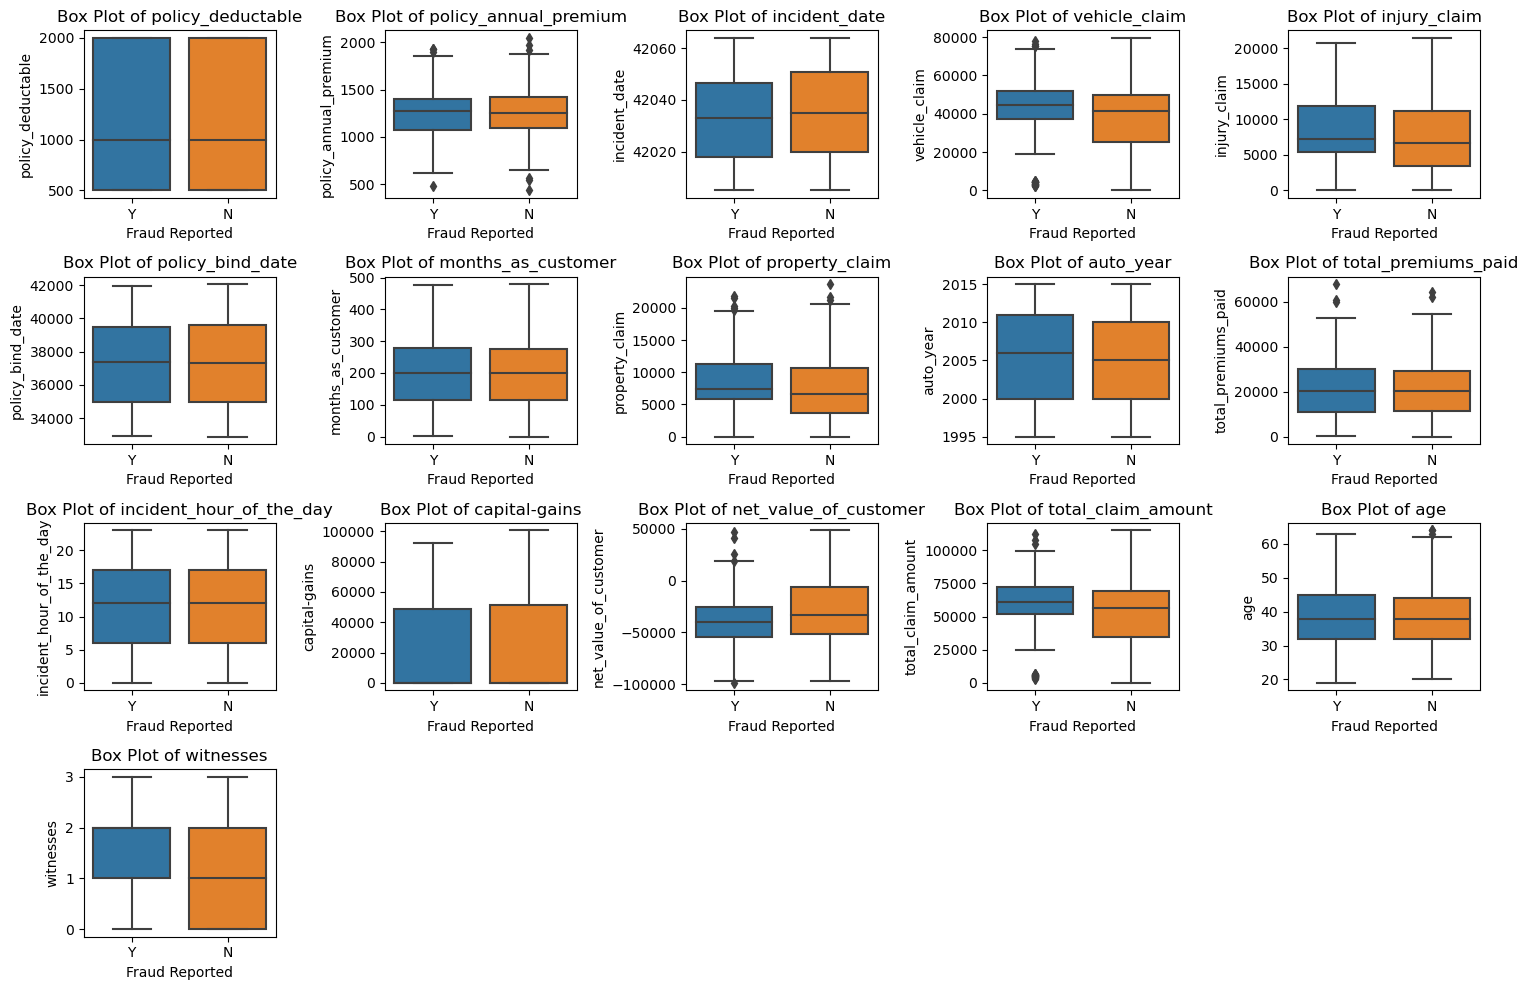

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the relevant data

# List of dummy variables to exclude
dummy_variables = [
    'incident_severity_Minor Damage', 'incident_severity_Total Loss',
    'insured_hobbies_chess', 'property_damage_NO'
]

# Exclude dummy variables from the top features
top_features = top_features[~top_features['Feature'].isin(dummy_variables)]

# Extract the top features from the coefficients dataframe
top_features_names = top_features['Feature'].tolist()

# Box plot for each top feature grouped by fraud
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features_names, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(x='fraud_reported', y=feature, data=df)
    plt.title(f'Box Plot of {feature}')
    plt.xlabel('Fraud Reported')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

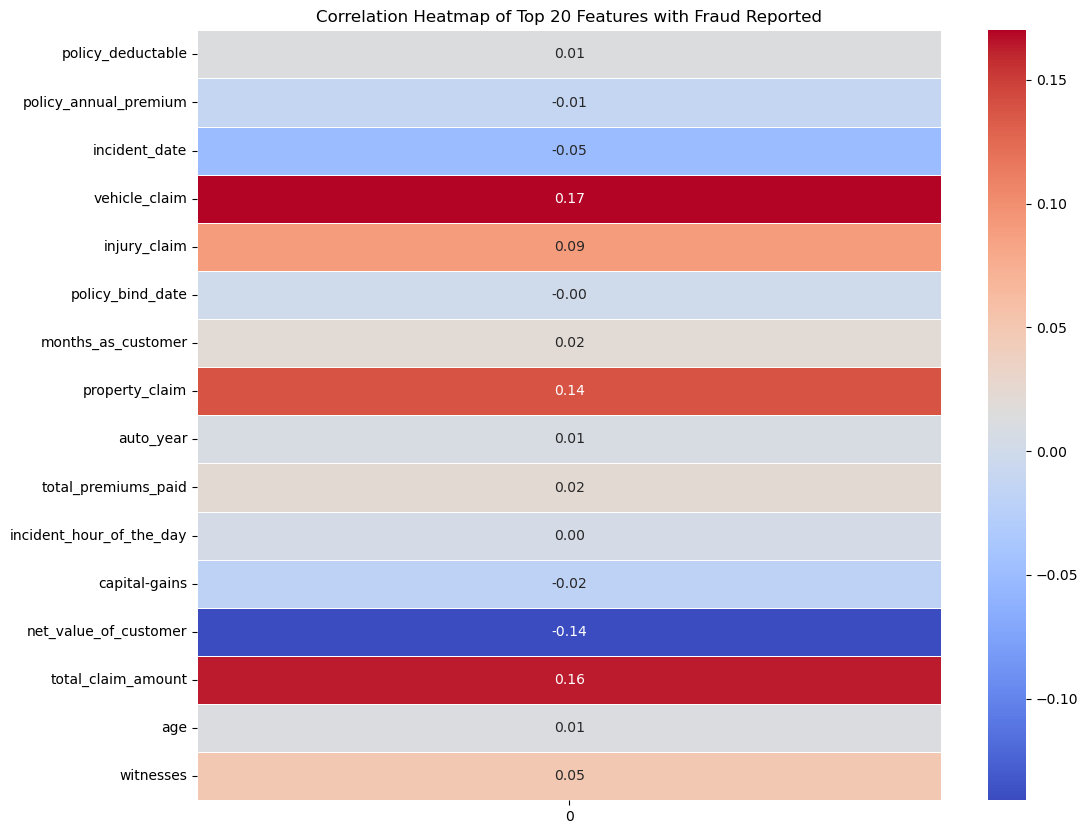

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the relevant data

# Extract the top 20 features from the top_features dataframe
top_20_features = top_features_names[:20]

# Compute the correlation matrix for the top 20 features with the target variable
correlation_matrix = df[top_20_features].corrwith(df['fraud_reported_numeric'])

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Top 20 Features with Fraud Reported')
plt.show()


## Fitting Model with top 10 Features


In [37]:
# Extract the top 10 features from the top_features dataframe
top_10_features = top_features_names[:10]

# Select only the top 10 features from the DataFrame
X_top_10 = df[top_10_features]

# Split the data into training and testing sets
X_train_top_10, X_test_top_10, y_train, y_test = train_test_split(X_top_10, y, test_size=0.2, random_state=50)

# Fit logistic regression model with only the top 10 features
lm_top_10 = LogisticRegression(max_iter=1000, C=0.5, penalty='l2', solver='lbfgs')
lm_top_10.fit(X_train_top_10, y_train)

# Generate predictions from the model
pred_lm_top_10 = lm_top_10.predict(X_test_top_10)

In [38]:
print('Logistic Regression Model with Top 10 Features')
print(classification_report(y_test, pred_lm_top_10, target_names=['Fraud', 'No Fraud']))

Logistic Regression Model with Top 10 Features
              precision    recall  f1-score   support

       Fraud       0.77      0.99      0.87       155
    No Fraud       0.00      0.00      0.00        45

    accuracy                           0.77       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.60      0.77      0.67       200



In [39]:
import pickle

# Save the model to a file
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lm_top_10, f)

In [40]:
# Get the coefficients from the logistic regression model
coefficients = lm_top_10.coef_[0]

# Get the feature names
feature_names = X_train_top_10.columns

# Combine feature names and coefficients into a DataFrame
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Calculate the absolute values of coefficients
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()

# Sort coefficients by absolute values and get the top 10
top_10_features = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False).head(10)

# Print the top 10 features
print("Top 10 Features in the Logistic Regression Model:")
print(top_10_features)

Top 10 Features in the Logistic Regression Model:
                 Feature  Coefficient  Absolute_Coefficient
6     months_as_customer    -0.003516              0.003516
8              auto_year    -0.001201              0.001201
1  policy_annual_premium    -0.000903              0.000903
0      policy_deductable     0.000151              0.000151
9    total_premiums_paid     0.000037              0.000037
3          vehicle_claim     0.000034              0.000034
2          incident_date     0.000034              0.000034
4           injury_claim    -0.000032              0.000032
5       policy_bind_date    -0.000008              0.000008
7         property_claim    -0.000003              0.000003
